In [33]:
import warnings
warnings.filterwarnings('ignore')
## That's bad I know :)

from sklearn import datasets
import pandas as pd
import numpy as np
import sklearn.metrics as metrix
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,cross_validate
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

rescale_=True

In [34]:
dataset = datasets.load_diabetes()

X = dataset.data
y = dataset.target

if rescale_ is True:
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [35]:
xgb_dart = xgb.XGBRegressor(max_depth=3,
                            n_estimators=1000,
                            booster="dart",
                            rate_drop=0.05,
                            random_state=42,
                            n_jobs=3,
                            min_child_weight=4,
                            learning_rate=0.99)

xgb_dart.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.99, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=3, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [36]:
y_pred = xgb_dart.predict(X_test)

mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
print(mse,RMSE)

3188.785096338401 56.46932881076595


In [37]:
xgb_grid = xgb.XGBRegressor(objective= 'reg:linear')
params = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]}

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : "rmse", 
            "eval_set" : [[X_test, y_test]]}


grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=params,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = KFold(n_splits=3,shuffle=True, random_state=42),
    verbose=1)

xgb_grid_model = grid_search.fit(X_train, y_train, **fit_params)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[16:21:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq0

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[49]	validation_0-rmse:57.78232
[11]	validation_0-rmse:57.94234
[18]	validation_0-rmse:58.08431
[50]	validation_0-rmse:57.77056
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[7]	validation_0-rmse:59.80312
[12]	validation_0-rmse:57.93009
[8]	validation_0-rmse:59.51225
[19]	validation_0-rmse:58.16042
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13]	validation_0-rmse:57.85705
[0]	validation_0-rmse:122.76405[0]	validation_0-rmse:123.68830
[8]	validation_0-rmse:59.63550

[1]	validation_0-rmse:97.44127
[9]	validation_0-rmse:59.03295
[2]	validation_0-rmse:82.01401
[51]	validation_0-rmse:57.75858
[1]	validation_0-rmse:100.02924
[16:21:41] WARNING: /var

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[20]	validation_0-rmse:59.80215
[21]	validation_0-rmse:59.76689
[14]	validation_0-rmse:60.31342
[17]	validation_0-rmse:60.78095
[17]	validation_0-rmse:59.76170
[18]	validation_0-rmse:58.73595
[18]	validation_0-rmse:60.85025
[22]	validation_0-rmse:59.78877
[18]	validation_0-rmse:59.61989
[19]	validation_0-rmse:58.81681
[19]	validation_0-rmse:60.79538
[19]	validation_0-rmse:59.65392[15]	validation_0-rmse:60.50311
[20]	validation_0-rmse:58.94262

[16]	validation_0-rmse:60.42452
[21]	validation_0-rmse:59.02152
[17]	validation_0-rmse:60.17792
[22]	validation_0-rmse:59.05452
[8]	validation_0-rmse:59.32276
[18]	validation_0-rmse:60.17055
[23]	validation_0-rmse:59.12588
[9]	validation_0-rmse:58.42308
[24]	validation_0-rmse:59.16283
[10]	validation_0-rmse:57.08812
[25]	validation_0-rmse:59.19369
[19]	validation_0-rmse:60.30335
[20]	validation_0-rmse:59.62725
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/r

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[11]	validation_0-rmse:58.47766
[10]	validation_0-rmse:62.23687
[23]	validation_0-rmse:60.61167
[24]	validation_0-rmse:60.81482
[12]	validation_0-rmse:58.42446
[18]	validation_0-rmse:57.07663
[11]	validation_0-rmse:62.80286
[25]	validation_0-rmse:60.82040
[19]	validation_0-rmse:57.10790
[24]	validation_0-rmse:60.57143
[26]	validation_0-rmse:60.84443
[13]	validation_0-rmse:58.66320
[12]	validation_0-rmse:62.03714
[20]	validation_0-rmse:57.04728
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[25]	validation_0-rmse:60.50168
[27]	validation_0-rmse:60.90792
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21]	validation_0-rmse:57.05290
[14]	validation_0-

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[22]	validation_0-rmse:57.53250
[12]	validation_0-rmse:60.08844
[0]	validation_0-rmse:122.74527
[1]	validation_0-rmse:96.11219
[23]	validation_0-rmse:57.36825
[10]	validation_0-rmse:62.34746
[13]	validation_0-rmse:60.07195
[7]	validation_0-rmse:61.58897
[2]	validation_0-rmse:81.24621
[30]	validation_0-rmse:59.31584
[14]	validation_0-rmse:60.17953
[24]	validation_0-rmse:57.29486
[3]	validation_0-rmse:72.03056
[31]	validation_0-rmse:59.26494
[11]	validation_0-rmse:62.03825
[8]	validation_0-rmse:60.80034
[4]	validation_0-rmse:67.27549
[15]	validation_0-rmse:60.32166
[25]	validation_0-rmse:57.22030
[32]	validation_0-rmse:59.29457
[16:21:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[5]	validation_0-rmse:62.92555
[16]	validation_0-rmse:60.44943
[26]	validation_0-rmse:57.20913
[33]	validation_0-rmse:59.28025
[12]	validation_0-rm

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[25]	validation_0-rmse:55.33694
[5]	validation_0-rmse:62.82633
[22]	validation_0-rmse:61.82069
[6]	validation_0-rmse:59.97111
[26]	validation_0-rmse:55.35273
[23]	validation_0-rmse:61.85793
[42]	validation_0-rmse:57.06149[7]	validation_0-rmse:59.46828

[24]	validation_0-rmse:61.88196
[27]	validation_0-rmse:55.30524
[19]	validation_0-rmse:58.65732
[8]	validation_0-rmse:58.85588
[43]	validation_0-rmse:57.06461
[38]	validation_0-rmse:58.96705
[25]	validation_0-rmse:61.79945
[9]	validation_0-rmse:58.83776
[44]	validation_0-rmse:57.06528
[20]	validation_0-rmse:58.29782
[28]	validation_0-rmse:55.24420
[10]	validation_0-rmse:58.62599[45]	validation_0-rmse:57.06408

[39]	validation_0-rmse:58.96690[26]	validation_0-rmse:61.77760

[29]	validation_0-rmse:55.35237
[46]	validation_0-rmse:57.06408
[11]	validation_0-rmse:58.50490
[4]	validation_0-rmse:64.22913
[47]	validation_0-rmse:57.06353
[21]	validation_0-rmse:58.39785
[40]	validation_0-rmse:59.02242
[12]	validation_0-rmse:58.84408
[48]	validatio

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[17]	validation_0-rmse:56.70310
[9]	validation_0-rmse:60.96004
[11]	validation_0-rmse:58.95016
[3]	validation_0-rmse:74.48892
[4]	validation_0-rmse:64.51157
[18]	validation_0-rmse:56.34554
[4]	validation_0-rmse:67.33718
[10]	validation_0-rmse:61.08590
[5]	validation_0-rmse:60.96138
[3]	validation_0-rmse:72.82491
[19]	validation_0-rmse:56.51356
[5]	validation_0-rmse:64.88471
[12]	validation_0-rmse:59.29820
[4]	validation_0-rmse:67.02522
[6]	validation_0-rmse:62.02020
[20]	validation_0-rmse:56.62748
[5]	validation_0-rmse:63.08732
[11]	validation_0-rmse:60.91676
[21]	validation_0-rmse:56.43466
[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13]	validation_0-rmse:59.63512
[22]	validation_0-rmse:56.47139
[0]	validation_0-rmse:123.51725
[6]	validation_0-rmse:60.90906
[6]	validation_0-rmse:58.60216
[7]	validation_0-rmse:61.

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[38]	validation_0-rmse:57.97730
[8]	validation_0-rmse:63.10184
[60]	validation_0-rmse:57.25387
[16]	validation_0-rmse:54.54503
[39]	validation_0-rmse:58.00279
[9]	validation_0-rmse:63.21309
[61]	validation_0-rmse:57.25512
[40]	validation_0-rmse:57.99831
[62]	validation_0-rmse:57.25515
[17]	validation_0-rmse:54.47544
[10]	validation_0-rmse:62.72087
[41]	validation_0-rmse:57.99529
[63]	validation_0-rmse:57.25559
[42]	validation_0-rmse:58.00040
[64]	validation_0-rmse:57.25490
[18]	validation_0-rmse:54.25169
[65]	validation_0-rmse:57.25454
[43]	validation_0-rmse:58.03092
[66]	validation_0-rmse:57.25363
[19]	validation_0-rmse:54.35384
[67]	validation_0-rmse:57.25303
[11]	validation_0-rmse:62.62332
[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[68]	validation_0-rmse:57.25430
[44]	validation_0-rmse:58.04804
[12]	validation

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[5]	validation_0-rmse:60.77294
[4]	validation_0-rmse:67.25480
[21]	validation_0-rmse:56.97054
[17]	validation_0-rmse:60.01003
[14]	validation_0-rmse:57.68045
[6]	validation_0-rmse:58.26913
[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[5]	validation_0-rmse:64.11170
[22]	validation_0-rmse:56.80397
[0]	validation_0-rmse:122.31690
[18]	validation_0-rmse:60.11212
[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[7]	validation_0-rmse:56.48775
[15]	validation_0-rmse:57.54982[6]	validation_0-rmse:64.07241

[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[9]	validation_0-rmse:60.39040
[19]	validation_0-rmse:62.01443
[4]	validation_0-rmse:68.62397
[25]	validation_0-rmse:58.38783
[16:21:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[37]	validation_0-rmse:54.06569
[0]	validation_0-rmse:122.83978
[1]	validation_0-rmse:100.06022[0]	validation_0-rmse:121.49901

[20]	validation_0-rmse:61.95603
[10]	validation_0-rmse:60.01703
[5]	validation_0-rmse:64.65503
[1]	validation_0-rmse:96.23391
[10]	validation_0-rmse:59.24718
[2]	validation_0-rmse:83.63603
[38]	validation_0-rmse:54.06884
[2]	validation_0-rmse:79.25183
[21]	validation_0-rmse:61.92877
[6]	validation_0-rmse:62

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[7]	validation_0-rmse:61.09004
[12]	validation_0-rmse:61.12117
[30]	validation_0-rmse:57.04657
[30]	validation_0-rmse:58.28103
[3]	validation_0-rmse:77.61597
[10]	validation_0-rmse:60.11182
[14]	validation_0-rmse:59.20120
[8]	validation_0-rmse:60.18688
[4]	validation_0-rmse:71.08647
[31]	validation_0-rmse:57.06527
[15]	validation_0-rmse:59.23980
[5]	validation_0-rmse:66.05403
[31]	validation_0-rmse:58.26211
[28]	validation_0-rmse:62.03984
[11]	validation_0-rmse:60.14748
[32]	validation_0-rmse:57.05674
[6]	validation_0-rmse:64.80396
[13]	validation_0-rmse:61.45002
[9]	validation_0-rmse:58.67046
[16]	validation_0-rmse:59.22419
[33]	validation_0-rmse:57.05792
[7]	validation_0-rmse:63.52826
[17]	validation_0-rmse:59.21919
[29]	validation_0-rmse:61.95854
[10]	validation_0-rmse:57.34679
[12]	validation_0-rmse:60.13033
[32]	validation_0-rmse:58.27853
[34]	validation_0-rmse:57.05478
[8]	validation_0-rmse:62.50841
[18]	validation_0-rmse:59.47499
[14]	validation_0-rmse:61.53486
[11]	validation_0

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16:21:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12]	validation_0-rmse:56.78381
[30]	validation_0-rmse:53.74320
[0]	validation_0-rmse:121.96196
[18]	validation_0-rmse:59.61394
[1]	validation_0-rmse:97.13836
[29]	validation_0-rmse:55.12797
[31]	validation_0-rmse:53.73515
[11]	validation_0-rmse:56.74124
[13]	validation_0-rmse:56.75897
[19]	validation_0-rmse:59.74730[2]	validation_0-rmse:82.38416

[30]	validation_0-rmse:55.12727
[12]	validation_0-rmse:56.67746
[32]	validation_0-rmse:53.73493
[31]	validation_0-rmse:55.11390
[14]	validation_0-rmse:56.83458
[20]	validation_0-rmse:59.73981
[33]	validation_0-rmse:53.75593
[3]	validation_0-rmse:73.46282
[13]	validation_0-rmse:56.72322
[16:21:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regress

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

ion_0-rmse:56.32045
[5]	validation_0-rmse:64.11170
[15]	validation_0-rmse:60.19598
[5]	validation_0-rmse:68.27824
[6]	validation_0-rmse:63.10585
[18]	validation_0-rmse:60.83781
[6]	validation_0-rmse:64.07241
[20]	validation_0-rmse:56.27598
[16]	validation_0-rmse:59.93873
[24]	validation_0-rmse:58.13930
[7]	validation_0-rmse:61.56555
[16]	validation_0-rmse:60.61596
[7]	validation_0-rmse:63.14188
[6]	validation_0-rmse:66.51140
[21]	validation_0-rmse:56.21556
[19]	validation_0-rmse:60.97215
[8]	validation_0-rmse:60.81572
[8]	validation_0-rmse:63.03056
[17]	validation_0-rmse:60.01003
[9]	validation_0-rmse:60.30535
[20]	validation_0-rmse:60.86656
[25]	validation_0-rmse:58.14828
[17]	validation_0-rmse:60.68409
[7]	validation_0-rmse:64.12249
[9]	validation_0-rmse:63.11547
[21]	validation_0-rmse:61.05952
[10]	validation_0-rmse:60.05950
[8]	validation_0-rmse:62.91595[26]	validation_0-rmse:58.22960

[18]	validation_0-rmse:60.76532
[11]	validation_0-rmse:59.76319
[18]	validation_0-rmse:60.11212
[

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

rmse:73.68364
[20]	validation_0-rmse:60.32171
[20]	validation_0-rmse:57.99411
[7]	validation_0-rmse:60.68164
[21]	validation_0-rmse:60.28331
[4]	validation_0-rmse:67.77405
[21]	validation_0-rmse:58.13606
[54]	validation_0-rmse:57.33977
[8]	validation_0-rmse:60.27548
[22]	validation_0-rmse:60.27457
[22]	validation_0-rmse:58.15693
[16:21:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[5]	validation_0-rmse:65.90688
[55]	validation_0-rmse:57.33982
[9]	validation_0-rmse:59.39994
[36]	validation_0-rmse:54.04343
[23]	validation_0-rmse:60.29891
[0]	validation_0-rmse:122.82079
[23]	validation_0-rmse:58.10784
[6]	validation_0-rmse:62.64624
[1]	validation_0-rmse:99.25110
[24]	validation_0-rmse:60.28477
[56]	validation_0-rmse:57.34161
[2]	validation_0-rmse:83.70767
[7]	validation_0-rmse:61.74230
[10]	validation_0-rmse:59.63315
[24]	val

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[23]	validation_0-rmse:55.22476
[4]	validation_0-rmse:64.46940
[24]	validation_0-rmse:57.54013
[7]	validation_0-rmse:61.31178
[0]	validation_0-rmse:121.77709
[10]	validation_0-rmse:62.27988
[1]	validation_0-rmse:96.57509[5]	validation_0-rmse:61.18402

[8]	validation_0-rmse:61.04478
[18]	validation_0-rmse:62.16384
[24]	validation_0-rmse:55.15285
[6]	validation_0-rmse:58.50580
[25]	validation_0-rmse:57.51505
[11]	validation_0-rmse:62.91579
[9]	validation_0-rmse:60.66324
[2]	validation_0-rmse:81.81372
[7]	validation_0-rmse:58.29380
[19]	validation_0-rmse:62.11946
[25]	validation_0-rmse:55.15855
[10]	validation_0-rmse:61.03664
[8]	validation_0-rmse:57.95799
[3]	validation_0-rmse:72.82491
[12]	validation_0-rmse:62.34082
[9]	validation_0-rmse:57.31935
[11]	validation_0-rmse:60.34891
[20]	validation_0-rmse:62.13130
[26]	validation_0-rmse:55.16051
[10]	validation_0-rmse:58.07794
[12]	validation_0-rmse:60.15968
[21]	validation_0-rmse:62.11495
[11]	validation_0-rmse:57.70620
[27]	validation_0-rm

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

4.13974
[18]	validation_0-rmse:57.11307
[0]	validation_0-rmse:122.76801
[21]	validation_0-rmse:61.80506
[31]	validation_0-rmse:56.30668
[24]	validation_0-rmse:53.15869
[1]	validation_0-rmse:100.03944
[19]	validation_0-rmse:57.25090
[17]	validation_0-rmse:56.27675
[2]	validation_0-rmse:84.29303
[29]	validation_0-rmse:58.27996
[25]	validation_0-rmse:53.10100
[6]	validation_0-rmse:61.35931
[3]	validation_0-rmse:78.11316
[26]	validation_0-rmse:53.10062
[7]	validation_0-rmse:59.80312
[18]	validation_0-rmse:56.23392
[20]	validation_0-rmse:57.28086
[4]	validation_0-rmse:71.98970
[27]	validation_0-rmse:53.00220
[5]	validation_0-rmse:66.94134
[8]	validation_0-rmse:59.63550
[21]	validation_0-rmse:56.97054
[6]	validation_0-rmse:65.76406
[28]	validation_0-rmse:52.98171
[9]	validation_0-rmse:59.03295
[30]	validation_0-rmse:58.28103
[19]	validation_0-rmse:56.32045
[22]	validation_0-rmse:56.80397
[7]	validation_0-rmse:64.64893
[29]	validation_0-rmse:53.01764
[10]	validation_0-rmse:58.95835
[23]	valid

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

542
[19]	validation_0-rmse:58.26821
[32]	validation_0-rmse:55.86332
[7]	validation_0-rmse:59.31903
[26]	validation_0-rmse:60.80059
[4]	validation_0-rmse:64.79689
[33]	validation_0-rmse:55.84955
[8]	validation_0-rmse:60.02472
[8]	validation_0-rmse:58.08637
[27]	validation_0-rmse:60.82787
[5]	validation_0-rmse:62.20367
[27]	validation_0-rmse:60.39514
[34]	validation_0-rmse:55.84199
[20]	validation_0-rmse:58.27090
[9]	validation_0-rmse:57.66456
[6]	validation_0-rmse:60.54122
[28]	validation_0-rmse:60.81241
[35]	validation_0-rmse:55.81996
[9]	validation_0-rmse:59.82714
[10]	validation_0-rmse:56.85819
[28]	validation_0-rmse:60.41017
[29]	validation_0-rmse:60.82783[7]	validation_0-rmse:60.61649

[10]	validation_0-rmse:59.83864
[11]	validation_0-rmse:56.64356
[16:21:44] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[30]	validation_0-

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[1]	validation_0-rmse:95.91751
[11]	validation_0-rmse:60.79329
[12]	validation_0-rmse:57.30478
[22]	validation_0-rmse:60.48865
[2]	validation_0-rmse:82.58809
[3]	validation_0-rmse:75.34504
[12]	validation_0-rmse:60.59708
[13]	validation_0-rmse:57.51733
[23]	validation_0-rmse:60.45340
[4]	validation_0-rmse:68.50027
[13]	validation_0-rmse:60.79491
[14]	validation_0-rmse:57.55306
[5]	validation_0-rmse:65.49049
[24]	validation_0-rmse:60.39241
[14]	validation_0-rmse:60.71294
[21]	validation_0-rmse:55.74441
[26]	validation_0-rmse:60.80059
[25]	validation_0-rmse:60.40669
[6]	validation_0-rmse:62.76200
[15]	validation_0-rmse:60.77127
[15]	validation_0-rmse:57.31091
[22]	validation_0-rmse:55.62663
[26]	validation_0-rmse:60.37598
[16]	validation_0-rmse:60.90630
[23]	validation_0-rmse:55.70451
[7]	validation_0-rmse:61.73825
[16]	validation_0-rmse:57.00592
[17]	validation_0-rmse:61.02517
[13]	validation_0-rmse:58.45108
[27]	validation_0-rmse:60.82787[8]	validation_0-rmse:61.27521

[17]	validation_

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[1]	validation_0-rmse:99.47206
[11]	validation_0-rmse:61.19200
[7]	validation_0-rmse:60.45954
[2]	validation_0-rmse:83.09777
[10]	validation_0-rmse:61.70851
[12]	validation_0-rmse:61.42317
[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[3]	validation_0-rmse:74.79734
[14]	validation_0-rmse:61.35256
[0]	validation_0-rmse:123.68830
[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11]	validation_0-rmse:61.30926
[1]	validation_0-rmse:97.26971
[13]	validation_0-rmse:61.40353
[8]	validation_0-rmse:60.26843
[4]	validation_0-rmse:68.87529
[12]	validation_0-rmse:61.33536
[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[7]	validation_0-rmse:60.48413
[22]	validation_0-rmse:62.74504
[14]	validation_0-rmse:56.19437
[19]	validation_0-rmse:60.47603
[8]	validation_0-rmse:58.88360
[23]	validation_0-rmse:62.71140
[20]	validation_0-rmse:60.46271
[9]	validation_0-rmse:58.65790
[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[24]	validation_0-rmse:62.71386
[21]	validation_0-rmse:60.51044
[5]	validation_0-rmse:64.86112
[15]	validation_0-rmse:56.07637
[0]	validation_0-rmse:123.68830
[10]	validation_0-rmse:58.99030
[25]	validation_0-rmse:62.78726
[22]	validation_0-rmse:60.48865
[1]	validation_0-rmse:97.26971
[11]	validation_0-rmse:58.65316
[2]	validation_0-rmse:82.78491
[12]	validation_0-rmse:56.80996
[16]	validation_0-rmse:55.91372
[5]	validation_0-rmse:62.20367
[3]	validation_0-rmse:73.40316
[12]	validation_0-rmse:58.67859
[23]	validation_0-rms

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[11]	validation_0-rmse:61.77086
[19]	validation_0-rmse:64.88247
[10]	validation_0-rmse:61.47356
[19]	validation_0-rmse:61.23044
[5]	validation_0-rmse:64.75438
[21]	validation_0-rmse:61.52455
[12]	validation_0-rmse:61.50520
[20]	validation_0-rmse:61.20571
[20]	validation_0-rmse:64.71963
[11]	validation_0-rmse:61.42984
[21]	validation_0-rmse:61.20383
[6]	validation_0-rmse:62.22649
[21]	validation_0-rmse:64.94009
[8]	validation_0-rmse:58.63024
[13]	validation_0-rmse:61.56809
[22]	validation_0-rmse:61.19444
[12]	validation_0-rmse:61.31240
[36]	validation_0-rmse:61.40301
[23]	validation_0-rmse:61.19501
[7]	validation_0-rmse:60.45954
[13]	validation_0-rmse:60.97875
[9]	validation_0-rmse:58.24101
[24]	validation_0-rmse:61.18569
[14]	validation_0-rmse:61.35684
[14]	validation_0-rmse:61.07628
[25]	validation_0-rmse:61.14935
[37]	validation_0-rmse:61.39221
[15]	validation_0-rmse:61.04319
[10]	validation_0-rmse:57.71035
[26]	validation_0-rmse:61.15532
[8]	validation_0-rmse:60.26673
[16]	validatio

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16]	validation_0-rmse:61.86805
[27]	validation_0-rmse:61.12804
[32]	validation_0-rmse:60.15055
[25]	validation_0-rmse:57.19614
[17]	validation_0-rmse:61.80241
[25]	validation_0-rmse:60.04060
[2]	validation_0-rmse:83.06829
[28]	validation_0-rmse:61.13181
[27]	validation_0-rmse:58.94627
[18]	validation_0-rmse:61.78479
[26]	validation_0-rmse:60.02323
[29]	validation_0-rmse:61.13329
[33]	validation_0-rmse:60.10961
[26]	validation_0-rmse:57.24840
[3]	validation_0-rmse:73.01856
[19]	validation_0-rmse:61.70961
[30]	validation_0-rmse:61.11104
[27]	validation_0-rmse:59.98283
[13]	validation_0-rmse:62.67236
[31]	validation_0-rmse:61.11030
[4]	validation_0-rmse:67.57051
[28]	validation_0-rmse:60.01784
[14]	validation_0-rmse:62.67699
[32]	validation_0-rmse:61.10537
[29]	validation_0-rmse:60.00238
[15]	validation_0-rmse:62.47624
[5]	validation_0-rmse:65.59798
[33]	validation_0-rmse:61.10671
[30]	validation_0-rmse:60.01701
[16]	validation_0-rmse:62.57842
[31]	validation_0-rmse:59.99705
[34]	validat

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[7]	validation_0-rmse:63.72003
[26]	validation_0-rmse:57.57512
[8]	validation_0-rmse:63.52980
[22]	validation_0-rmse:62.56767
[0]	validation_0-rmse:123.77228
[5]	validation_0-rmse:65.91764
[1]	validation_0-rmse:101.82907
[27]	validation_0-rmse:57.53106
[9]	validation_0-rmse:62.75160
[23]	validation_0-rmse:62.60600
[2]	validation_0-rmse:86.16741
[8]	validation_0-rmse:63.61389
[10]	validation_0-rmse:62.79844
[6]	validation_0-rmse:63.64944
[24]	validation_0-rmse:62.76557
[11]	validation_0-rmse:62.41530
[16:21:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[25]	validation_0-rmse:62.78096
[12]	validation_0-rmse:62

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[13]	validation_0-rmse:64.12402
[27]	validation_0-rmse:61.74417
[26]	validation_0-rmse:60.50658
[7]	validation_0-rmse:63.87270
[18]	validation_0-rmse:61.93472
[27]	validation_0-rmse:60.54906
[8]	validation_0-rmse:63.11312
[28]	validation_0-rmse:60.53773[9]	validation_0-rmse:62.26490

[1]	validation_0-rmse:101.36197
[19]	validation_0-rmse:61.83285
[29]	validation_0-rmse:60.52809
[10]	validation_0-rmse:61.70851
[5]	validation_0-rmse:65.38844
[7]	validation_0-rmse:61.39341
[20]	validation_0-rmse:61.89222
[11]	validation_0-rmse:61.30926
[30]	validation_0-rmse:60.52550
[6]	validation_0-rmse:62.88969
[14]	validation_0-rmse:64.03277
[12]	validation_0-rmse:61.33536
[7]	validation_0-rmse:62.56044
[31]	validation_0-rmse:60.52059
[8]	validation_0-rmse:62.05886
[13]	validation_0-rmse:61.10678
[8]	validation_0-rmse:60.44767[9]	validation_0-rmse:62.33829
[14]	validation_0-rmse:61.03460

[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[10]	validation_0-rmse:59.27725
[14]	validation_0-rmse:61.61830
[2]	validation_0-rmse:84.90076
[11]	validation_0-rmse:59.34060
[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[3]	validation_0-rmse:74.93462
[15]	validation_0-rmse:61.31857
[4]	validation_0-rmse:67.77928
[14]	validation_0-rmse:62.09990
[16]	validation_0-rmse:61.40113
[18]	validation_0-rmse:61.22469
[5]	validation_0-rmse:64.85614
[15]	validation_0-rmse:62.14523
[17]	validation_0-rmse:61.30755
[4]	validation_0-rmse:68.79181
[19]	validation_0-rmse:61.26534
[6]	validation_0-rmse:62.76639
[3]	validation_0-rmse:76.65337
[16]	validation_0-rmse:62.00732
[18]	validation_0-rmse:61.71147
[20]	validation_0-rmse:61.20502
[7]	validation_0-rmse:61.96353
[12]	validation_0-rmse:59.25076
[0]	validation_0-rmse:122.55188
[5]	validation_0-rmse:65.91764
[17]	validation_0-rmse

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[22]	validation_0-rmse:58.99492
[7]	validation_0-rmse:63.83876
[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11]	validation_0-rmse:61.32075
[23]	validation_0-rmse:59.01741
[8]	validation_0-rmse:63.92744
[0]	validation_0-rmse:121.28267
[0]	validation_0-rmse:123.07511
[7]	validation_0-rmse:61.40741
[26]	validation_0-rmse:59.85937
[9]	validation_0-rmse:63.88984
[1]	validation_0-rmse:95.91751
[1]	validation_0-rmse:98.93827
[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12]	validation_0-rmse:61.59863
[24]	validation_0-rmse:59.01063
[2]	validation_0-rmse:85.44310[2]	validation_0-rmse:82.58809

[10]	validation_0-rmse:63.69668
[0]	validation_0-rmse:123.

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn

[0]	validation_0-rmse:123.51725
[8]	validation_0-rmse:61.25049
[34]	validation_0-rmse:55.69472
[2]	validation_0-rmse:82.10057
[1]	validation_0-rmse:97.29713
[9]	validation_0-rmse:60.54959
[25]	validation_0-rmse:61.14935
[3]	validation_0-rmse:72.13226
[2]	validation_0-rmse:84.66673
[21]	validation_0-rmse:60.71247
[10]	validation_0-rmse:59.27725
[4]	validation_0-rmse:67.58136
[3]	validation_0-rmse:74.59309
[11]	validation_0-rmse:59.34060
[5]	validation_0-rmse:63.86053
[26]	validation_0-rmse:61.15532
[4]	validation_0-rmse:70.45725
[3]	validation_0-rmse:72.47018
[35]	validation_0-rmse:55.70130
[12]	validation_0-rmse:59.25076
[6]	validation_0-rmse:61.19550
[5]	validation_0-rmse:67.22646
[27]	validation_0-rmse:61.14400
[22]	validation_0-rmse:60.62475
[20]	validation_0-rmse:56.73105
[6]	validation_0-rmse:65.13948
[7]	validation_0-rmse:59.32499
[13]	validation_0-rmse:59.39150
[28]	validation_0-rmse:61.14532
[36]	validation_0-rmse:55.72307
[7]	validation_0-rmse:63.78293
[8]	validation_0-rmse:58

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[50]	validation_0-rmse:59.73136
[7]	validation_0-rmse:62.13560
[5]	validation_0-rmse:64.64503
[43]	validation_0-rmse:60.13105
[8]	validation_0-rmse:61.50120
[6]	validation_0-rmse:61.35469
[51]	validation_0-rmse:59.73209
[27]	validation_0-rmse:60.98085
[9]	validation_0-rmse:60.12627
[7]	validation_0-rmse:59.97161
[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10]	validation_0-rmse:59.17217
[0]	validation_0-rmse:123.51974
[0]	validation_0-rmse:121.41390
[8]	validation_0-rmse:59.98438
[52]	validation_0-rmse:59.73204
[1]	validation_0-rmse:97.30501
[1]	validation_0-rmse:96.98846
[11]	validation_0-rmse:59.0

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[9]	validation_0-rmse:62.87616
[16]	validation_0-rmse:56.55260
[5]	validation_0-rmse:64.75438
[24]	validation_0-rmse:61.71659
[16:21:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[6]	validation_0-rmse:62.22649
[10]	validation_0-rmse:63.24883
[25]	validation_0-rmse:61.73279
[0]	validation_0-rmse:123.15958
[7]	validation_0-rmse:60.45954
[11]	validation_0-rmse:63.13238
[1]	validation_0-rmse:99.38351
[26]	validation_0-rmse:61.15532
[12]	validation_0-rmse:62.76914
[2]	validation_0-rmse:84.59568
[8]	validation_0-rmse:60.26673
[19]	validation_0-rmse:64.88247
[3]	validation_0-rmse:76.71655
[13]	validation_0-rmse:63.29149
[9]	validation_0-rmse:60.28490
[13]	validation_0-rmse:66.55071
[4]	validation_0-rmse:68.76114
[17]	validation_0-rmse:56.74793
[20]	validation_0-rmse:64.71963
[10]	validation_0-rmse:60.26799
[14]	validation_0-rmse:

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:62.06154
[6]	validation_0-rmse:60.54122
[18]	validation_0-rmse:55.77093
[24]	validation_0-rmse:58.95272
[9]	validation_0-rmse:57.85092
[7]	validation_0-rmse:60.61649
[15]	validation_0-rmse:62.03206
[19]	validation_0-rmse:55.79129
[25]	validation_0-rmse:58.95841
[8]	validation_0-rmse:60.52122
[16]	validation_0-rmse:61.88834
[20]	validation_0-rmse:55.72860
[26]	validation_0-rmse:58.96049
[11]	validation_0-rmse:60.57562
[9]	validation_0-rmse:60.29709
[17]	validation_0-rmse:62.12242
[21]	validation_0-rmse:55.77482
[27]	validation_0-rmse:58.94627
[10]	validation_0-rmse:60.31998
[24]	validation_0-rmse:60.35792[22]	validation_0-rmse:55.73395
[18]	validation_0-rmse:61.93472
[12]	validation_0-rmse:60.18678
[11]	validation_0-rmse:59.84795
[10]	validation_0-rmse:57.38578
[23]	validation_0-rmse:55.67503

[19]	validation_0-rmse:61.83285
[12]	validation_0-rmse:60.53992
[24]	validation_0-rmse:55.60957
[11]	validation_0-rmse:56.70902
[13]	validation_0-rmse:60.47345
[13]	validati

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-reg-env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning

[14]	validation_0-rmse:61.38828
[15]	validation_0-rmse:61.22460
[16]	validation_0-rmse:61.34179
[17]	validation_0-rmse:61.50768
[18]	validation_0-rmse:61.49165
[19]	validation_0-rmse:61.39548
[20]	validation_0-rmse:61.33774
[21]	validation_0-rmse:61.31807
[22]	validation_0-rmse:61.29924
[23]	validation_0-rmse:61.32215
[24]	validation_0-rmse:61.32562


In [38]:
print('Best Parameter:')
print(xgb_grid_model.best_params_)
print('Best Estimator:') 
print(xgb_grid_model.best_estimator_)

Best Parameter:
{'colsample_bytree': 0.7, 'max_depth': 20, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9}
Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)


In [39]:
y_pred_train = xgb_grid_model.best_estimator_.predict(X_train)
y_pred = xgb_grid_model.best_estimator_.predict(X_test)

In [40]:
print ('On train set:')
mse=metrix.mean_squared_error(y_train, y_pred_train)
RMSE = metrix.mean_squared_error(y_train, y_pred_train, squared=False)
r2_ = metrix.r2_score(y_train, y_pred_train)
print(mse,RMSE,r2_)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)



On train set:
30.227333157400636 5.49793899178598 0.9950254520699915
On test set:
3748.452203176389 61.224604557125474 0.292498142540765


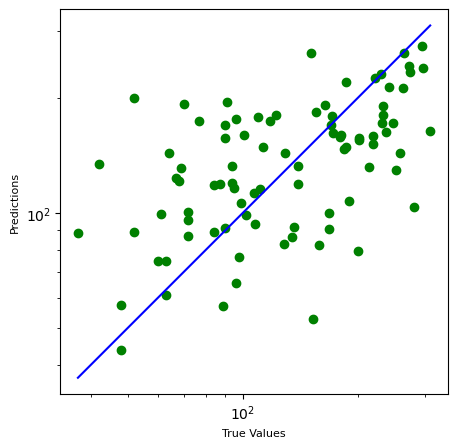

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

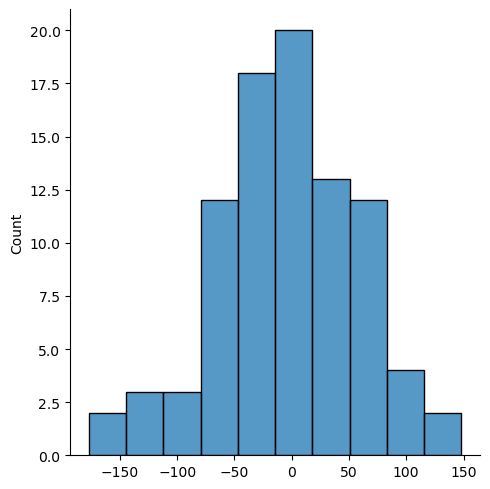

In [42]:
sns.displot(y_pred-y_test)

In [43]:
from sklearn.linear_model import Ridge,Lasso

model = Ridge(alpha=0.05) 
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)

On test set:
2899.613434103344 53.84805877748374 0.4527122718002198


In [44]:
parameters = {'alpha':[0.001,0.01,0.05,0.1,0.5,1,10]}

model = Ridge()

r_grid= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=3)

r_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [45]:
print('Best Parameter:')
print(r_grid.best_params_)
print('Best Estimator:') 
print(r_grid.best_estimator_)

Best Parameter:
{'alpha': 0.5}
Best Estimator:
Ridge(alpha=0.5)


In [46]:
r_best = r_grid.best_estimator_
model = r_best.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print ('On test set:')
mse=metrix.mean_squared_error(y_test, y_pred)
RMSE = metrix.mean_squared_error(y_test, y_pred, squared=False)
r2_ = metrix.r2_score(y_test, y_pred)
print(mse,RMSE,r2_)

On test set:
2895.3537564391304 53.8084914900904 0.45351626494092334


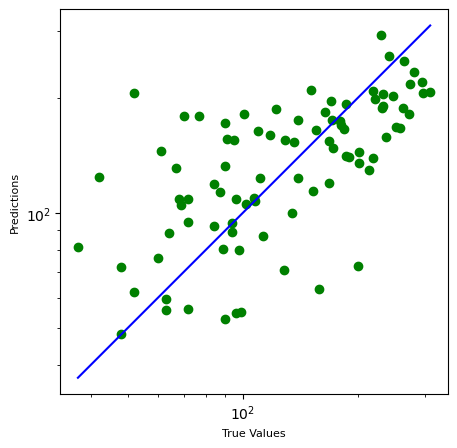

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

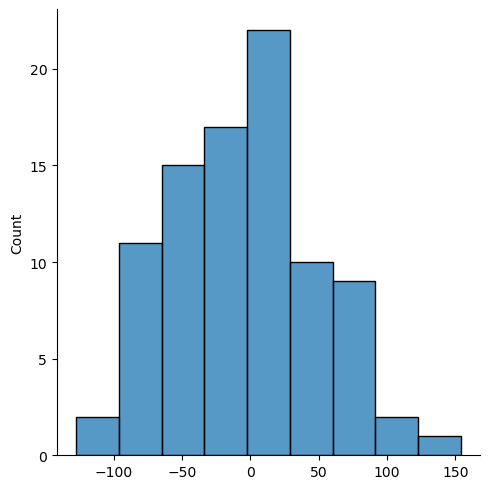

In [48]:
sns.displot(y_pred-y_test)